


<h1 align=center> Financial Access Clustering using DBSCAN & scikit-learn </h1>
<hr>

Geospatial mapping of all cash outlets in Tanzania in 2012. Cash outlets in this case included commercial banks, community banks, ATMs, microfinance institutions, mobile money agents, bus stations and post offices. This data was collected by FSDT. 

This dataset is supplemented with data from the FSDT Finscope 2017 survey that demographic information and what financial services are used by approximately 10,000 individuals across Tanzania.

By locating areas of high density that are separated from one another by areas of low density, this density-based clustering analysis aims to identify the group of access points which may represent clusters of individuals that remain excluded from financial products and institutions. 

Density, in this context, is defined as the number of points within a specified radius.  The advantage of using this procedure is that it finds different arbitrary shaped clusters without getting affected by noise.




In this section, the main focus will be manipulating the data and properties of DBSCAN and observing the resulting clustering.


Let's start playing with the data. We will be working according to the following workflow: </font>
1. Loading data
- Overview data
- Data cleaning
- Data selection
- Clusteing


Clustering of financial access points

- average distance from each access points
- aver access points per region
- trading hours
- leading institutions
-


In [143]:
import numpy as np 
from sklearn.cluster import DBSCAN 
from sklearn.datasets import make_blobs 
from sklearn.preprocessing import StandardScaler 
import matplotlib.pyplot as plt 
%matplotlib inline
import warnings
warnings.filterwarnings("ignore", category=DeprecationWarning)

#GIS
from arcgis.gis import GIS
from arcgis.geocoding import geocode, reverse_geocode
from arcgis.geometry import Point
from geopy.distance import geodesic

gis = GIS("http://www.arcgis.com","chirpc","Sexzyp110890***")



In [144]:
import csv
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder

##PATHS##
pth=r'C:\Users\SALDRU1\Dropbox\PC\Desktop\ml_lres\lab_wb_fin_incl\\'

##CANVAS VARIABLES##
s_bnk = "FSDT_FinAccessMapping\\banks_for_upload_win.csv"
s_atm = "FSDT_FinAccessMapping\\atm_for_upload_win.csv"
s_mfi = "FSDT_FinAccessMapping\\microfinance_for_upload_win.csv"
s_mom = "FSDT_FinAccessMapping\\mobilemoney_agents_for_upload_win.csv"
s_ppp = "FSDT_FinAccessMapping\\3rd_ppp_for_upload_win.csv"
s_scc = "FSDT_FinAccessMapping\\sacco_for_upload_win.csv"
s_bus = "FSDT_FinAccessMapping\\bus_stands_for_upload_win.csv"
s_pos = "FSDT_FinAccessMapping\\pos_for_upload_win.csv"
s_pst = "FSDT_FinAccessMapping\\post_office_for_upload_win.csv"

##


### 2- PREPROCESSING
We will import the .csv then we creates the columns for year, month and day.

## Financial access points by location (ward)


In [145]:
##merge financial access points files 

#Load mobile money financial access data and aggregate
v = "mobilemoney_agents_for_upload_win.csv"
df_acc = pd.read_csv(pth + "FSDT_FinAccessMapping\\" + v, encoding='latin1')
df_acc = df_acc[['region','district','ward','latitude','longitude']]
df_acc["type"] = "MoM"

##Count the number of financial access points per area##
#df_acc['no_MoM'] = 1
df_acc_agg = df_acc.groupby(['region']).size().reset_index(name='no_fin_acc')
df_acc_agg['perc_fin_acc'] = (df_acc_agg['no_fin_acc']/df_acc_agg['no_fin_acc'].sum())*100
print("Name of file upload: ", v)
print("Dimensions (full): ", df_acc.shape)
print("Dimensions (aggregated): ", df_acc_agg.shape)

#for i in df_acc['region'].unique():
#    print(i)

#Create a master list for number of financial access points per area 

dict_files = {
"Bank": "banks_for_upload_win.csv", 
"ATM": "atm_for_upload_win.csv",
"MFI": "microfinance_for_upload_win.csv",
"PPP": "3rd_ppp_for_upload_win.csv", 
"Sacc": "sacco_for_upload_win.csv",
"Bus": "bus_stands_for_upload_win.csv",
"POS": "pos_for_upload_win.csv",
"Post": "post_office_for_upload_win.csv"   
}


#for x in list_path:	
for k,v in dict_files.items():
    #v = dict_files[x]
    #list_path.remove(x)
    
    print('----------------' + k + '----------------')
    print("Name of file upload: ", v)
    df = pd.read_csv(pth + "FSDT_FinAccessMapping\\" +  v, encoding='latin1')
    
    #Creat master list for financial access
    df = df[['region','district','ward','latitude','longitude']]
    df["type"] = k
    df_acc = pd.concat([df_acc,df])
    
    #Create aggregate list for the number of financial access point per ward
    #df = df[['region','district','ward','latitude','longitude']]   
    #df['no_'+k] = 1
    df_agg = df.groupby(['region']).size().reset_index(name='no_fin_acc')
    df_agg['perc_fin_acc'] = (df_agg['no_fin_acc']/df_agg['no_fin_acc'].sum())*100
    print("Dimensions: ", df_agg.shape)
    
    #df_acc_agg=df_acc_agg.append(df_agg)
    pd.concat([df_acc_agg,df_agg])
    #df.to_csv(pth + v,  sep=",", encoding='utf-8',index=False)

print('\n----------------')
print("Financial access points master list (full): ", df_acc.shape)
print("Financial access points master list (aggregated): ", df_acc_agg.shape)
df_acc_agg.to_csv(pth + "fin_access_agg.csv")
df_acc.to_csv(pth + "fin_access.csv")
#df_acc.head()

C:\Users\SALDRU1\AppData\Local\Temp\ipykernel_12236\3918694763.py:5: DtypeWarning: Columns (26,32,33,42,74) have mixed types. Specify dtype option on import or set low_memory=False.
  df_acc = pd.read_csv(pth + "FSDT_FinAccessMapping\\" + v, encoding='latin1')


Name of file upload:  mobilemoney_agents_for_upload_win.csv
Dimensions (full):  (45429, 6)
Dimensions (aggregated):  (22, 3)
----------------Bank----------------
Name of file upload:  banks_for_upload_win.csv
Dimensions:  (22, 3)
----------------ATM----------------
Name of file upload:  atm_for_upload_win.csv
Dimensions:  (22, 3)
----------------MFI----------------
Name of file upload:  microfinance_for_upload_win.csv
Dimensions:  (21, 3)
----------------PPP----------------
Name of file upload:  3rd_ppp_for_upload_win.csv
Dimensions:  (21, 3)
----------------Sacc----------------
Name of file upload:  sacco_for_upload_win.csv
Dimensions:  (22, 3)
----------------Bus----------------
Name of file upload:  bus_stands_for_upload_win.csv
Dimensions:  (17, 3)
----------------POS----------------
Name of file upload:  pos_for_upload_win.csv
Dimensions:  (19, 3)
----------------Post----------------
Name of file upload:  post_office_for_upload_win.csv
Dimensions:  (22, 3)

----------------
Financ

In [146]:
print(df_acc.shape)
df_acc.head()

(56019, 6)


,region,district,ward,latitude,longitude,type
0,Ruvuma,Tunduru,Kalulu,-10.28298,40.18363,MoM
1,Ruvuma,Tunduru,Kalulu,-10.28457,40.18295,MoM
2,Kilimanjaro,Moshi Urban,Bondeni,-3.36025,37.33803,MoM
3,Dar es Salaam,Kinondoni,Manzese,-6.80213,39.22978,MoM
4,Kilimanjaro,Moshi Urban,Kiusa,-3.35613,37.33382,MoM


In [147]:
print(df_acc_agg.shape)
df_acc_agg.head()

(22, 3)


,region,no_fin_acc,perc_fin_acc
0,Arusha,3075,6.771785
1,Dar es Salaam,13687,30.141602
2,Dodoma,2212,4.871281
3,Iringa,2171,4.780991
4,Kagera,1642,3.616023


## Respondent location by region

In [148]:
#Prepare financial inclusion data

# Below code extracts region based on coordinates using argis reverse geocoding method
df_inc = pd.read_csv(pth + "master.csv")
df_inc_loc = df_inc[['ID','Latitude','Longitude']]
df_inc_loc=df_inc_loc.rename(columns = {'Latitude':'lat1','Longitude':'lon1'})

#Check if data has any nulls
drop_col = []
for i in df_inc_loc.columns:
    perc_na = df_inc_loc[i].isna().sum()/len(df)*100
    if perc_na > 0:
        print(i)
    #no null values dectected detected

reg_lst = []
#Use argis module to find region of geolocation
for i in df_inc_loc.index:
    x = df_inc_loc.iloc[i]['lat1']
    y = df_inc_loc.iloc[i]['lon1']
    #print(x,y)
    
    unknown_pt = Point({"x":y,"y":x})
    #print(unknown_pt)
    address = reverse_geocode(location=unknown_pt)
    #print(address['address']['Region'])
    reg_lst.append(address['address']['Region'])
    #df_inc_loc.iloc[i]['Region'] = address['address']['Region']
df_inc_loc['region'] = reg_lst

df_inc_loc = pd.merge(df_inc_loc, df_acc_agg, how='left', on=['region'])
df_inc_loc.head()
df_inc_loc.to_csv(pth + "region.csv")


df_inc_loc = pd.read_csv(pth + "region.csv")
df_inc_loc.shape

(9459, 7)

In [141]:
df_inc_loc = pd.read_csv(pth + "region.csv")
df_inc_loc.head()

,Unnamed: 0,ID,lat1,lon1,region,no_fin_acc_x,perc_fin_acc_x,no_fin_acc_y,perc_fin_acc_y
0,0,5086,-4.460442,29.811396,Kigoma,1338.0,2.946552,1338.0,2.946552
1,1,1258,-6.176438,39.244871,Mjini Magharibi,NaN,NaN,NaN,NaN
2,2,331,-6.825702,37.652798,Morogoro,1441.0,3.173380,1441.0,3.173380
3,3,6729,-3.372049,35.808307,Arusha,3075.0,6.771785,3075.0,6.771785
4,4,8671,-7.179645,31.039095,Rukwa,551.0,1.213416,551.0,1.213416


## Nearest distance from financial access point


In [69]:

#for i in acc_lst:
#Prepare financial access point data
#df_acc_loc = df_acc[['region','district','ward','latitude','longitude']].loc[df_acc["MoM"]==1]
df_acc_loc = df_acc
#print(df_acc_loc.shape)

df_acc_loc=df_acc_loc.rename(columns = {'latitude':'lat','longitude':'lon'})
df_inc_loc=df_inc_loc.rename(columns = {'lat1':'lat','lon1':'lon'})

#Drop any rows with missing latitude and longitude
df_inc_loc=df_inc_loc.dropna(subset=['lat','lon'])
print(df_inc_loc.shape)
df_acc_loc=df_acc_loc.dropna(subset=['lat','lon'])
print(df_acc_loc.shape)

#Creates new columns converting coordinate degrees to radians.
for column in df_inc_loc[["lat", "lon"]]:
    rad = np.deg2rad(df_inc_loc[column].values)
    df_inc_loc[f'{column}_rad'] = rad
for column in df_acc_loc[["lat", "lon"]]:
    rad = np.deg2rad(df_acc_loc[column].values)
    df_acc_loc[f'{column}_rad'] = rad

#print(df_inc_loc.info())

(9459, 4)
(56019, 8)


In [70]:

from faker import Faker
from sklearn.neighbors import BallTree
from geopy import distance

import functools
import time

#Engineering features from latitude and longitude data can seem like a messy task that may tempt 
#novices into creating their own apply function (or even worse: an enormous for loop). 
#However, these types of brute force approaches are potential pitfalls that will unravel quickly 
#when the size of the dataset increases.

#Fortunately, you do not need to calculate the distance between every point. 
#There are a few data structures to efficiently determine neighbors right in scikit-learn that leverage 
#the power of priority queues.

#A ball tree is similar to a k-d tree except that instead of making partitions across a single dimension,
#it will divide points based on radial distances to a center. It handles higher dimensional data better 
#and will also permit the use of the Haversine metric.

#To use a ball tree with the Haversine distance in scikit-learn, you must first convert the coordinates
#from degrees to radians.

# Timing Decorator
def timer(func):
    """Print the runtime of the decorated function"""
    @functools.wraps(func)
    def wrapper_timer(*args, **kwargs):
        start_time = time.perf_counter()    # 1
        value = func(*args, **kwargs)
        end_time = time.perf_counter()      # 2
        run_time = end_time - start_time    # 3
        print(f"Finished {func.__name__!r} in {run_time:.4f} secs")
        return value
    return wrapper_timer

def generate_balltree(df):
    '''
        Generate Balltree using customize distance (i.e. Geodesic distance)
    '''
    #return  BallTree(df[['lat', 'lon']].values, metric=lambda u, v: distance.distance(u, v).miles)
    # Takes the first group's latitude and longitude values to construct # the ball tree.
    ball = BallTree(df[["lat_rad", "lon_rad"]].values, metric='haversine')
    return ball

#@timer
def find_matches(tree, df):
    '''
        Find closest matches in df to items in tree
    '''
    # The amount of neighbors to return.
    k = 1
    # Executes a query with the second group. This will also return two
    # arrays.
    distances, indices = tree.query(df[["lat_rad", "lon_rad"]].values, k = k)   
    #distances, indices = tree.query(df[['lat', 'lon']].values, k = 1)

    ###########################################
    # The amount of neighbors to return.
    ##k = 2
    # Executes a query with the second group. This will also return two
    # arrays.
    ##distances, indices = tree.query(df[["lat_rad", "lon_rad"]].values, k = k)   
    ##min_dist = np.asanyarray([i[1] for i in distances])
    ##min_loc = np.asanyarray([i[1] for i in indices])
    ##df['min_dist'] = min_dist * 6371
    ##df['min_loc'] = min_loc  
    ##return df
    #############################################
        
    df['min_dist'] = distances * 6371
    df['min_loc'] = indices  
    return df


In [71]:
acc_lst = ["MoM", "Bank", "ATM", "MFI", "PPP", "Sacc", "Bus", "POS", "Post"]



dist_lst=[]
for i in acc_lst:
    print(i)
    #for i in acc_lst:
    #Prepare financial access point data
    df_tmp = df_acc_loc.loc[df_acc_loc['type']==i]
    print(df_tmp.shape)

    region_lst = list(df_inc_loc['region'].dropna().unique())
    #dist_lst=[]
    #for r in region_lst:
        #print(str(i)+"/"+str(len(region_lst))+": ",r)
    try:
        #df2 = df_inc_loc.loc[df_inc_loc['region'].str.lower()==r.lower()]
        #df1 = df_loc.loc[df_loc['region'].str.lower()==r.lower()]
        df2 = df_inc_loc
        df1 = df_tmp
        tree = generate_balltree(df1)
        df=find_matches(tree, df2)
        df['min_dist_'+i] = df['min_dist']
        df['min_loc_'+i] = df['min_loc']
        #df['type']=i
        #print(df)
        dist_lst.append(df.to_dict('records'))
        #print(len(dist_lst))
    except:
        pass
        #print('no match')
        
df_loc = df
col_dist= ['min_dist_MoM','min_dist_Bank','min_dist_ATM','min_dist_MFI','min_dist_PPP','min_dist_Sacc','min_dist_Bus','min_dist_POS','min_dist_Post']
df_loc = df_loc.assign(min_dist = df_loc[col_dist].min(axis=1), min_type=(df_loc[col_dist].idxmin(axis=1)))
df_loc['min_type'] = df_loc['min_type'].str.rsplit("_",1,expand=True)[1]
#df_loc['min_dist_type'] = df
#df_loc['type'].unique()
#df_loc = pd.DataFrame(None)

#for i in range(len(dist_lst)):
 #   df_loc = df_loc.append(dist_lst[i], ignore_index=True)


MoM
(45429, 10)
Bank
(616, 10)
ATM
(975, 10)
MFI
(294, 10)
PPP
(6900, 10)
Sacc
(1171, 10)
Bus
(49, 10)
POS
(405, 10)
Post
(180, 10)


In [104]:
acc_dict = {
    "MoM":"red", 
    "Bank":"blue", 
    "ATM":"yellow", 
    "POS":"green",  
    "MFI":"orange", 
    "Sacc":"purple", 
    "Post":"pink", 
    "PPP":"grey", 
    "Bus":"brown"
}

loc_col = []
for i in df_loc['min_type'].to_list():
    for k, v in acc_dict.items():
        if k == i:
            loc_col.append(v)
            
df_loc['col'] =loc_col
df_loc.sort_values(by='ID')
df_loc.to_csv(pth + "fin_incl_dist.csv")
df_loc

,ID,lat,lon,region,lat_rad,lon_rad,min_dist,min_loc,min_dist_MoM,min_loc_MoM,...,min_dist_Sacc,min_loc_Sacc,min_dist_Bus,min_loc_Bus,min_dist_POS,min_loc_POS,min_dist_Post,min_loc_Post,min_type,col
0,5086,-4.460442,29.811396,Kigoma,-0.077849,0.520307,3.245788,51,3.245788,31421,...,32.174329,641,34.230444,43,227.225120,96,33.654118,51,MoM,red
1,1258,-6.176438,39.244871,Mjini Magharibi,-0.107799,0.684952,1.292799,177,1.292799,39714,...,4.918423,1078,66.022278,22,5.613890,198,4.512002,177,MoM,red
2,331,-6.825702,37.652798,Morogoro,-0.119131,0.657165,0.122506,109,0.122506,250,...,0.335244,1056,120.888521,16,139.064094,377,0.541854,109,MoM,red
3,6729,-3.372049,35.808307,Arusha,-0.058853,0.624973,0.031501,105,0.031501,5195,...,5.115917,620,170.276607,9,37.040948,194,5.176185,105,MoM,red
4,8671,-7.179645,31.039095,Rukwa,-0.125308,0.541734,7.665565,151,7.665565,26028,...,36.110567,707,297.744234,42,106.685663,278,93.087482,151,MoM,red
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9454,2245,-2.652871,32.288152,Rukwa,-0.046301,0.563535,13.902493,26,13.902493,20360,...,25.024987,197,24.738690,4,25.330132,10,25.380301,26,MoM,red
9455,5651,-3.410241,31.509764,Rukwa,-0.059520,0.549949,6.632536,14,6.632536,25503,...,6.782346,387,8.100463,46,8.044749,96,43.588611,14,MoM,red
9456,6463,-3.372177,33.911149,Iringa,-0.058856,0.591861,9.295746,88,9.359189,36821,...,9.295746,419,25.567276,13,25.458116,115,9.356359,88,Sacc,purple
9457,1508,-1.681963,33.707227,Ruvuma,-0.029356,0.588302,0.803748,125,0.803748,33962,...,18.699890,995,41.710824,1,21.770072,208,23.644184,125,MoM,red


### 4-Visualization
Visualization of stations on map using basemap package. The matplotlib basemap toolkit is a library for plotting 2D data on maps in Python. Basemap does not do any plotting on it’s own, but provides the facilities to transform coordinates to a map projections. 

Please notice that the size of each data points represents the average of maximum temperature for each station in a year. 


## Location of Financial Access Points

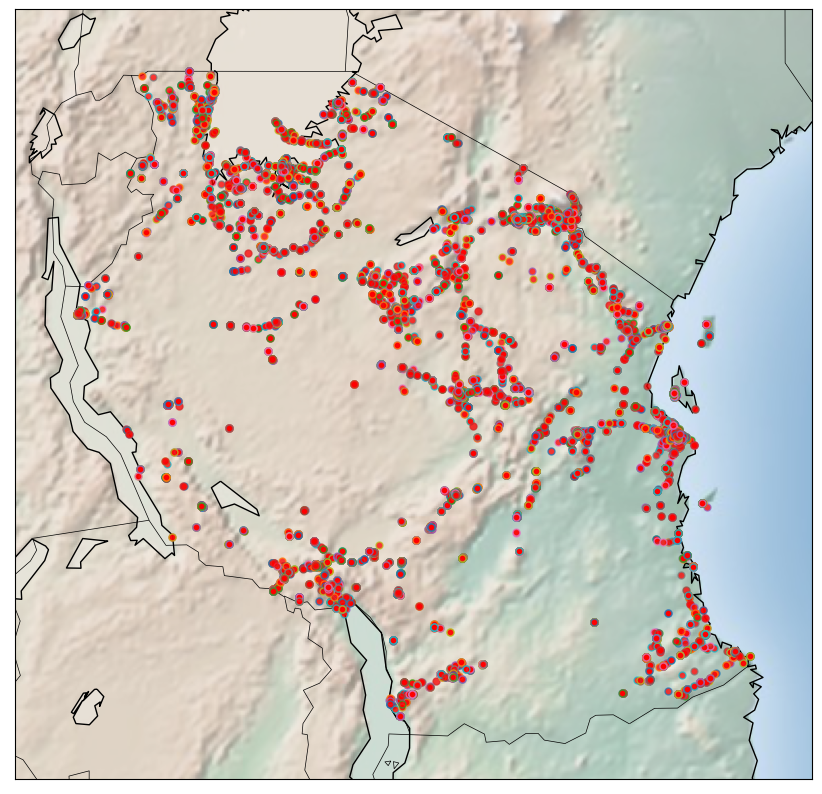

In [125]:
from mpl_toolkits.basemap import Basemap
import matplotlib.pyplot as plt
from pylab import rcParams
%matplotlib inline
rcParams['figure.figsize'] = (14,10)
#Subset dataset
#df_mom=df_mom.iloc[:,0:5]

#col_lst = [("red","o"), ("blue","s"), ("yellow","^"), ("green","*"), ("orange","+"),("purple",">"), ("pink","<"), ("grey","d"),("brown",".")]

llon=np.min(df_acc['longitude'])-1
ulon=np.max(df_acc['longitude'])+1
llat=np.min(df_acc['latitude'])-1
ulat=np.max(df_acc['latitude'])+1

#pdf = pdf[(pdf['Long'] > llon) & (pdf['Long'] < ulon) & (pdf['Lat'] > llat) &(pdf['Lat'] < ulat)]

my_map = Basemap(projection='merc',
            resolution = 'l', area_thresh = 1000.0,
            llcrnrlon=llon, llcrnrlat=llat, #min longitude (llcrnrlon) and latitude (llcrnrlat)
            urcrnrlon=ulon, urcrnrlat=ulat) #max longitude (urcrnrlon) and latitude (urcrnrlat)

my_map.drawcoastlines()
my_map.drawcountries()
# my_map.drawmapboundary()
my_map.fillcontinents(color = 'white', alpha = 0.3)
my_map.shadedrelief()

# To collect data based on mobile money access points        

#acc
xs,ys = my_map(np.asarray(df_acc['longitude']), np.asarray(df_acc['latitude']))
df_acc['xm']= xs.tolist()
df_acc['ym'] =ys.tolist()


#Visualization1

for index,row in df_acc.iterrows():
    #   x,y = my_map(row.Long, row.Lat)
    #my_map.plot(row.xm, row.ym,markerfacecolor= v[0],  marker="o", markersize= 5, alpha = 0.75)
    my_map.plot(row.xm, row.ym,markerfacecolor =([1,0,0]),  marker='.', markersize= 10, alpha = 0.75)
    #plt.text(x,y,stn)
plt.show()



## Location of Respondents

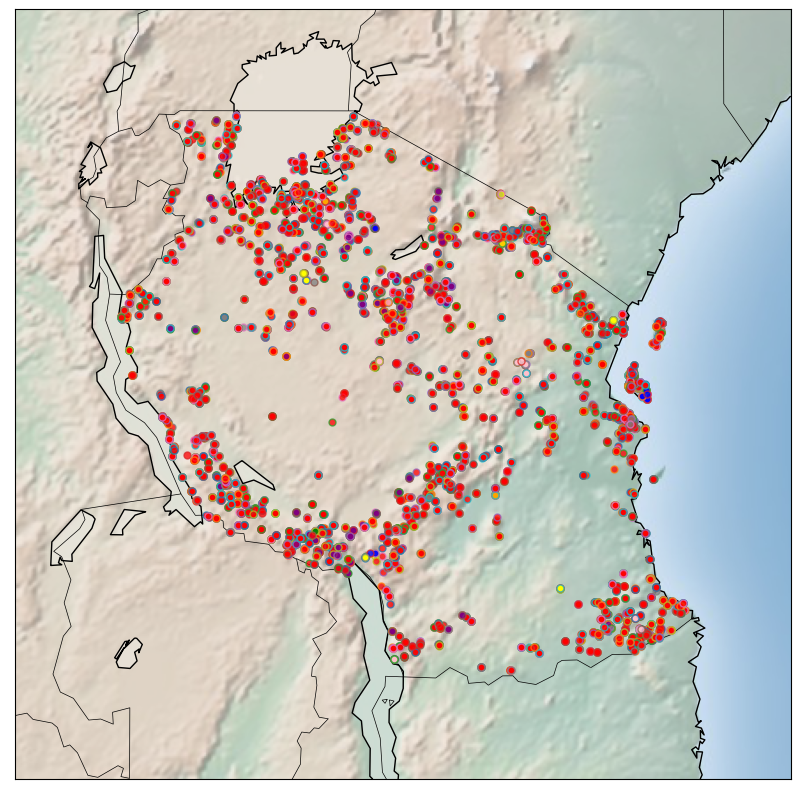

In [108]:
from mpl_toolkits.basemap import Basemap
import matplotlib.pyplot as plt
from pylab import rcParams
%matplotlib inline
rcParams['figure.figsize'] = (14,10)
#Subset dataset
#df_mom=df_mom.iloc[:,0:5]

acc_dict = {
    "MoM":["red","o"], 
    "Bank":["blue","s"], 
    "ATM":["yellow","^"], 
    "POS":["green","*"],  
    "MFI":["orange","+"], 
    "Sacc":["purple",">"], 
    "Post":["pink","<"], 
    "PPP":["grey","d"], 
    "Bus":["brown","."]
}
col_lst = ["red", "blue", "yellow", "green", "orange","purple", "pink", "grey","brown"]
#col_lst = [("red","o"), ("blue","s"), ("yellow","^"), ("green","*"), ("orange","+"),("purple",">"), ("pink","<"), ("grey","d"),("brown",".")]

llon=np.min(df_loc['lon'])-2
ulon=np.max(df_loc['lon'])+2
llat=np.min(df_loc['lat'])-2
ulat=np.max(df_loc['lat'])+2

#pdf = pdf[(pdf['Long'] > llon) & (pdf['Long'] < ulon) & (pdf['Lat'] > llat) &(pdf['Lat'] < ulat)]

my_map = Basemap(projection='merc',
            resolution = 'l', area_thresh = 1000.0,
            llcrnrlon=llon, llcrnrlat=llat, #min longitude (llcrnrlon) and latitude (llcrnrlat)
            urcrnrlon=ulon, urcrnrlat=ulat) #max longitude (urcrnrlon) and latitude (urcrnrlat)

my_map.drawcoastlines()
my_map.drawcountries()
# my_map.drawmapboundary()
my_map.fillcontinents(color = 'white', alpha = 0.3)
my_map.shadedrelief()

# To collect data based on mobile money access points        

#acc
xs,ys = my_map(np.asarray(df_loc['lon']), np.asarray(df_loc['lat']))
df_loc['xm']= xs.tolist()
df_loc['ym'] =ys.tolist()
df_loc['col'] =loc_col


#Visualization1

for index,row in df_loc.iterrows():
    #   x,y = my_map(row.Long, row.Lat)
    #my_map.plot(row.xm, row.ym,markerfacecolor= v[0],  marker="o", markersize= 5, alpha = 0.75)
    my_map.plot(row.xm, row.ym,markerfacecolor =row.col,  marker='.', markersize= 10, alpha = 0.75)
    #plt.text(x,y,stn)
plt.show()



### 5- Clustering of stations based on their location i.e. Lat & Lon

__DBSCAN__ form sklearn library can run DBSCAN clustering from vector array or distance matrix. In our case, we pass it the Numpy array Clus_dataSet to find core samples of high density and expands clusters from them. 


In [80]:
from sklearn.cluster import DBSCAN
import sklearn.utils
from sklearn.preprocessing import StandardScaler
sklearn.utils.check_random_state(1000)
Clus_dataSet = df_loc[['xm','ym']]
Clus_dataSet = np.nan_to_num(Clus_dataSet)
Clus_dataSet = StandardScaler().fit_transform(Clus_dataSet)

# Compute DBSCAN
db = DBSCAN(eps=0.15, min_samples=10).fit(Clus_dataSet)
core_samples_mask = np.zeros_like(db.labels_, dtype=bool)
core_samples_mask[db.core_sample_indices_] = True
labels = db.labels_
df_loc["Clus_Db"]=labels

realClusterNum=len(set(labels)) - (1 if -1 in labels else 0)
clusterNum = len(set(labels)) 
print('Number of Clusters: ', clusterNum)

# A sample of clusters
df_loc['Clus_Db'].value_counts()
#set(labels)

Number of Clusters:  19


 1     5574
 2     2131
 4      820
 7      195
 3      171
 0      169
 10     120
-1       74
 5       44
 8       34
 13      29
 9       19
 6       19
 11      10
 12      10
 14      10
 15      10
 16      10
 17      10
Name: Clus_Db, dtype: int64

As you can see for outliers, the cluster label is -1


### 6- Visualization of clusters based on location
Now, we can visualize the clusters using basemap:


Nearest Financial Access Point within Cluster 
-----------
0
Cluster 0: 
 Nearest distance is 0.0039km from MFI and an average distance of 7.4545km 

1
Cluster 1: 
 Nearest distance is 0.0003km from PPP and an average distance of 6.2303km 

2
Cluster 2: 
 Nearest distance is 0.0011km from MoM and an average distance of 11.5876km 

3
Cluster 3: 
 Nearest distance is 0.0090km from MoM and an average distance of 8.5219km 

4
Cluster 4: 
 Nearest distance is 0.0093km from MoM and an average distance of 9.2326km 

5
Cluster 5: 
 Nearest distance is 0.3394km from MoM and an average distance of 7.1494km 

6
Cluster 6: 
 Nearest distance is 0.2170km from MoM and an average distance of 16.1381km 

7
Cluster 7: 
 Nearest distance is 0.0026km from MoM and an average distance of 4.2177km 

8
Cluster 8: 
 Nearest distance is 97.3790km from MoM and an average distance of 111.8093km 

9
Cluster 9: 
 Nearest distance is 0.1551km from MoM and an average distance of 17.3632km 

10
Cluster 10: 
 Nearest 

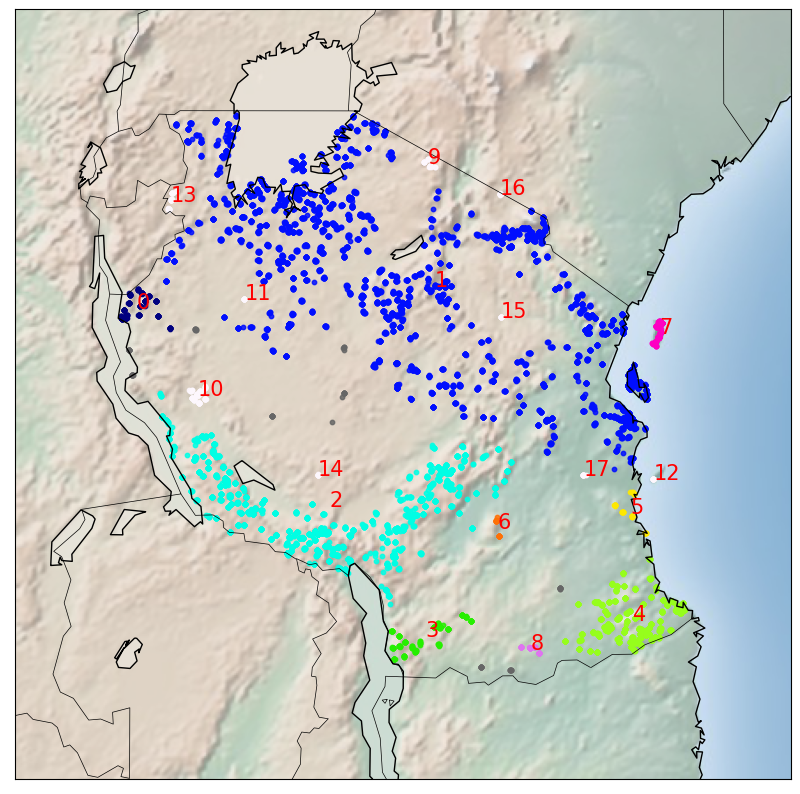

In [98]:
from mpl_toolkits.basemap import Basemap
import matplotlib.pyplot as plt
from pylab import rcParams
%matplotlib inline
rcParams['figure.figsize'] = (14,10)

my_map = Basemap(projection='merc',
            resolution = 'l', area_thresh = 1000.0,
            llcrnrlon=llon, llcrnrlat=llat, #min longitude (llcrnrlon) and latitude (llcrnrlat)
            urcrnrlon=ulon, urcrnrlat=ulat) #max longitude (urcrnrlon) and latitude (urcrnrlat)

my_map.drawcoastlines()
my_map.drawcountries()
#my_map.drawmapboundary()
my_map.fillcontinents(color = 'white', alpha = 0.3)
my_map.shadedrelief()

# To create a color map
colors = plt.get_cmap('gist_ncar')(np.linspace(0.0, 2.0, clusterNum))



#Visualization1
print('Nearest Financial Access Point within Cluster \n-----------')

for i,clust_number in enumerate(set(labels)):
    print(i)
    c=(([0.4,0.4,0.4]) if clust_number == -1 else colors[np.int(clust_number)])
    clust_set = df_loc[df_loc.Clus_Db == clust_number]                    
    my_map.scatter(clust_set.xm, clust_set.ym, color =c,  marker='o', s= 10, alpha = 0.85)
    if clust_number != -1:
        cenx=np.mean(clust_set.xm) 
        ceny=np.mean(clust_set.ym) 
        plt.text(cenx,ceny,str(clust_number), fontsize=15, color='red',)
        print ('Cluster ' + str(clust_number)+': \n Nearest distance is '+ '%.4f' % np.min(clust_set.min_dist) + "km from " +  str(clust_set.loc[clust_set.min_dist==np.min(clust_set.min_dist)]['min_type'].values[0]) + " and an average distance of " + '%.4f' % np.mean(clust_set.min_dist) + "km \n")
        #if i < 3 :
        #    print(str(clust_set.loc[clust_set.min_dist==np.min(clust_set.min_dist)]['min_type'].iloc[i]))
        #    print ('Cluster ' + str(clust_set.iloc[i].Clus_Db)+': \n Nearest distance is '+ '%.4f' % np.min(clust_set.iloc[i].min_dist) + "km from " +  str(clust_set.loc[clust_set.min_dist==np.min(clust_set.min_dist)]['min_type'].iloc[i]) + " and an average distance of " + '%.4f' % np.mean(clust_set.iloc[i].min_dist) + "km \n")

### 7- Clustering of stations based on their location, mean, max, and min Temperature
In this section we re-run DBSCAN, but this time on a 5-dimensional dataset:


In [14]:
le = LabelEncoder()
label_type = le.fit_transform(df_loc['min_type'])
df_loc["min_type2"] = label_type
df_loc.head()

,ID,lat,lon,region,lat_rad,lon_rad,min_dist,min_loc,min_dist_MoM,min_loc_MoM,...,min_dist_POS,min_loc_POS,min_dist_Post,min_loc_Post,min_type,col,xm,ym,Clus_Db,min_type2
0,5086,-4.460442,29.811396,Kigoma,-0.077849,0.520307,3.245788,51,3.245788,31421,...,227.225120,96,33.654118,51,MoM,red,2.414951e+05,1.015087e+06,0,3
1,1258,-6.176438,39.244871,Mjini Magharibi,-0.107799,0.684952,1.292799,177,1.292799,39714,...,5.613890,198,4.512002,177,MoM,red,1.290449e+06,8.234452e+05,1,3
2,331,-6.825702,37.652798,Morogoro,-0.119131,0.657165,0.122506,109,0.122506,250,...,139.064094,377,0.541854,109,MoM,red,1.113419e+06,7.507827e+05,1,3
3,6729,-3.372049,35.808307,Arusha,-0.058853,0.624973,0.031501,105,0.031501,5195,...,37.040948,194,5.176185,105,MoM,red,9.083209e+05,1.136396e+06,1,3
4,8671,-7.179645,31.039095,Rukwa,-0.125308,0.541734,7.665565,151,7.665565,26028,...,106.685663,278,93.087482,151,MoM,red,3.780089e+05,7.111302e+05,2,3


In [15]:
from sklearn.cluster import DBSCAN
import sklearn.utils
from sklearn.preprocessing import StandardScaler
sklearn.utils.check_random_state(1000)
Clus_dataSet = df_loc[['xm','ym','min_dist']]
Clus_dataSet = np.nan_to_num(Clus_dataSet)
Clus_dataSet = StandardScaler().fit_transform(Clus_dataSet)

# Compute DBSCAN
db = DBSCAN(eps=0.3, min_samples=10).fit(Clus_dataSet)
core_samples_mask = np.zeros_like(db.labels_, dtype=bool)
core_samples_mask[db.core_sample_indices_] = True
labels = db.labels_
df_loc["Clus_Db"]=labels

realClusterNum=len(set(labels)) - (1 if -1 in labels else 0)
clusterNum = len(set(labels)) 
print('Number of Clusters: ', clusterNum)

# A sample of clusters
df_loc[["ID","region","min_dist","Clus_Db"]].head(5)

Number of Clusters:  38


,ID,region,min_dist,Clus_Db
0,5086,Kigoma,3.245788,0
1,1258,Mjini Magharibi,1.292799,1
2,331,Morogoro,0.122506,1
3,6729,Arusha,0.031501,1
4,8671,Rukwa,7.665565,1


### 8- Visualization of clusters based on location and Temperture


Cluster 0: 
 Nearest distance is 0.0039km from MFI and an average distance of 7.4545km 

Cluster 1: 
 Nearest distance is 0.0003km from PPP and an average distance of 5.9582km 

Cluster 2: 
 Nearest distance is 32.5479km from MoM and an average distance of 36.9247km 

Cluster 3: 
 Nearest distance is 16.4610km from MoM and an average distance of 17.1835km 

Cluster 4: 
 Nearest distance is 0.0093km from MoM and an average distance of 7.6611km 

Cluster 5: 
 Nearest distance is 40.6319km from MoM and an average distance of 40.9432km 

Cluster 6: 
 Nearest distance is 0.0090km from MoM and an average distance of 2.2361km 

Cluster 7: 
 Nearest distance is 30.3625km from MoM and an average distance of 30.7295km 

Cluster 8: 
 Nearest distance is 30.9765km from MoM and an average distance of 34.7397km 

Cluster 9: 
 Nearest distance is 23.7759km from MoM and an average distance of 24.8830km 

Cluster 10: 
 Nearest distance is 40.8546km from MoM and an average distance of 40.8755km 

Cluste

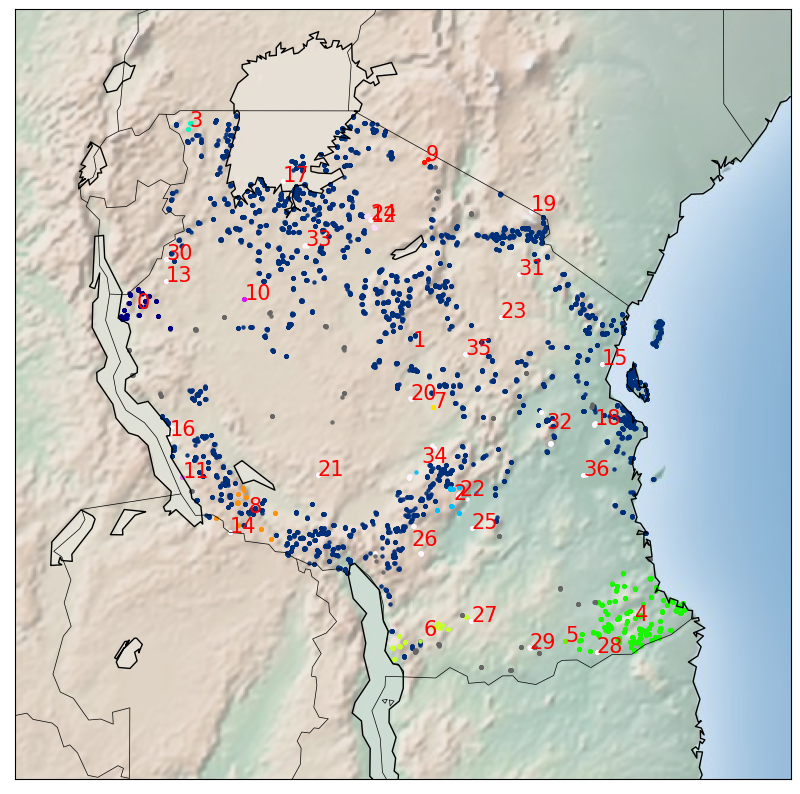

In [17]:
from mpl_toolkits.basemap import Basemap
import matplotlib.pyplot as plt
from pylab import rcParams
%matplotlib inline
rcParams['figure.figsize'] = (14,10)

my_map = Basemap(projection='merc',
            resolution = 'l', area_thresh = 1000.0,
            llcrnrlon=llon, llcrnrlat=llat, #min longitude (llcrnrlon) and latitude (llcrnrlat)
            urcrnrlon=ulon, urcrnrlat=ulat) #max longitude (urcrnrlon) and latitude (urcrnrlat)

my_map.drawcoastlines()
my_map.drawcountries()
#my_map.drawmapboundary()
my_map.fillcontinents(color = 'white', alpha = 0.3)
my_map.shadedrelief()

# To create a color map
colors = plt.get_cmap('gist_ncar')(np.linspace(0.0, 3.0, clusterNum))



#Visualization1
for clust_number in set(labels):
    c=(([0.4,0.4,0.4]) if clust_number == -1 else colors[np.int(clust_number)])
    clust_set = df_loc[df_loc.Clus_Db == clust_number]                    
    my_map.scatter(clust_set.xm, clust_set.ym, color =c,  marker='.', s= 20, alpha = 0.85)
    if clust_number != -1:
        cenx=np.mean(clust_set.xm) 
        ceny=np.mean(clust_set.ym) 
        plt.text(cenx,ceny,str(clust_number), fontsize=15, color='red',)
        
        print ('Cluster ' + str(clust_number)+': \n Nearest distance is '+ '%.4f' % np.min(clust_set.min_dist) + "km from " +  str(clust_set.loc[clust_set.min_dist==np.min(clust_set.min_dist)]['min_type'].values[0]) + " and an average distance of " + '%.4f' % np.mean(clust_set.min_dist) + "km \n")

<h2>Want to learn more?</h2>

IBM SPSS Modeler is a comprehensive analytics platform that has many machine learning algorithms. It has been designed to bring predictive intelligence to decisions made by individuals, by groups, by systems – by your enterprise as a whole. A free trial is available through this course, available here: <a href="https://www.ibm.com/analytics/spss-statistics-software?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMDeveloperSkillsNetworkML0101ENSkillsNetwork1047-2023-01-01">SPSS Modeler</a>

Also, you can use Watson Studio to run these notebooks faster with bigger datasets. Watson Studio is IBM's leading cloud solution for data scientists, built by data scientists. With Jupyter notebooks, RStudio, Apache Spark and popular libraries pre-packaged in the cloud, Watson Studio enables data scientists to collaborate on their projects without having to install anything. Join the fast-growing community of Watson Studio users today with a free account at <a href="https://www.ibm.com/cloud/watson-studio?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMDeveloperSkillsNetworkML0101ENSkillsNetwork1047-2023-01-01">Watson Studio</a>



### Thank you for completing this lab!


## Author

Saeed Aghabozorgi


### Other Contributors

<a href="https://www.linkedin.com/in/joseph-s-50398b136/?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMDeveloperSkillsNetworkML0101ENSkillsNetwork1047-2023-01-01">Joseph Santarcangelo</a>




## Change Log


|  Date (YYYY-MM-DD) |  Version | Changed By  |  Change Description |
|---|---|---|---|
| 2020-11-03  | 2.1  | Lakshmi  |  Updated url of csv  |
| 2020-08-27  | 2.0  | Lavanya  |  Moved lab to course repo in GitLab |
|   |   |   |   |
|   |   |   |   |


## <h3 align="center"> © IBM Corporation 2020. All rights reserved. <h3/>
